# Part I - FordGo Bike Sharing System Data 2019
## by David Tendai Gondo

## Introduction
> This dataset contains data about the individual bike rides people booked in the year 2019 in the area covering San Francisco . We are to visualize the data to get insights on the attributes of people who take longer bike rides to enable a targeted marketing campaign to increase thier numbers.

#### What is the combination of attributes that lead to users who take longer bike rides?

### Univariate Analysis
**What is the distribution of the various attributes in the concerned bike ride duration zone**

### Bivariate Analysis
**What are the relationships that exists between these attributes**

### Multivariate Analysis
**What combination of these attributes make up the desired user persona**


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
bikes= pd.read_csv("bike-data.csv")
bikes

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [3]:
#High level overview of the data
print(bikes.shape)
print(bikes.info())
print(bikes.isnull().sum())


(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

**We wont be using the data in most of the columns with null values.But we will need to use the columns for gender and age.So lets first see if the columns are signficant to the overal dataset**

In [4]:
#Calculate percentage of null rows to the overall dataset
percentage_of_null = 8265/183412 * 100
percentage_of_null

4.506248228033062

**They make only 4.5 % of the data so we can delete them. This will prevent bias when we want to see impact of these variables relative to other variable**

In [5]:
#Drop all rows without member gender
bikes.dropna(axis=0, subset = 'member_gender',inplace = True )
bikes

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [6]:
#Check again if everything is correct
bikes.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           195
start_station_name         195
start_station_latitude       0
start_station_longitude      0
end_station_id             195
end_station_name           195
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
dtype: int64

**Now all the rows left have all the data, except for the sation ids, which we will not need since we can use station names to get the same info**

In [7]:
#Generate descriptive statistics
bikes.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,175147.000000,174952.000000,175147.000000,175147.000000,174952.000000,175147.000000,175147.000000,175147.000000,175147.000000
mean,704.211845,139.002126,37.770814,-122.351305,136.604486,37.771007,-122.350881,4482.252639,1984.806437
std,1641.608363,111.648819,0.101070,0.118453,111.335635,0.100978,0.118018,1658.303747,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3802.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397405,4959.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.285171,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


**These are not very useful since most of them cannot be used for any meaningful computation.However The important ones are the duration sec and the date of birth columns.**
**We cannot explicitly use the member_birth_year column, but rather the age that we could get from calculating the current age of the bikers**
**There are some incorrect data in the member_birth_year column eg the minimum year is 1878, that is unfeasible because it would mean the person was over a 100 years old.So we will turn an data below 5 years and above 90 as zero**

In [8]:
#Create column with birth year from the member_birth_year column
bikes['age'] = 2019 - bikes['member_birth_year']
bikes

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,23.0
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,35.0
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,29.0
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,31.0


In [9]:
#Convert any age above 90 to zero
bikes['age'].values[bikes['age']> 90] = 0
bikes.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age
count,175147.000000,174952.000000,175147.000000,175147.000000,174952.000000,175147.000000,175147.000000,175147.000000,175147.000000,175147.000000
mean,704.211845,139.002126,37.770814,-122.351305,136.604486,37.771007,-122.350881,4482.252639,1984.806437,34.141995
std,1641.608363,111.648819,0.101070,0.118453,111.335635,0.100978,0.118018,1658.303747,10.116689,9.990225
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3802.000000,1980.000000,27.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397405,4959.000000,1987.000000,32.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.285171,5505.000000,1992.000000,39.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,89.000000


In [10]:
#Drop the member year column, we will now be using the age column instead
bikes.drop(['member_birth_year'],inplace=True,axis=1)
bikes

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,35.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,47.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,30.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,45.0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,Male,No,23.0
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,Male,No,35.0
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,Male,Yes,29.0
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,Male,No,31.0


**The co-ordinates columns would require us to know the places from the map, this might be unncessarily cumbersome since we already know the geographic sample of our data.So we can remove this . It might also contribute very little to answering our research question, to substitute for removing, we will keep the station names , they can guide us in a similar direction if we need to**

In [11]:
#Drop the co-ordinates columns
bikes.drop(inplace=True , columns=(["end_station_latitude","start_station_latitude","end_station_longitude","start_station_longitude"]),axis=1)
bikes

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,35.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,47.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,No,30.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,Male,Yes,45.0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,Male,No,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,324.0,Union Square (Powell St at Post St),4832,Subscriber,Male,No,23.0
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),66.0,3rd St at Townsend St,4960,Subscriber,Male,No,35.0
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,277.0,Morrison Ave at Julian St,3824,Subscriber,Male,Yes,29.0
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,216.0,San Pablo Ave at 27th St,5095,Subscriber,Male,No,31.0


### What is the structure of your dataset?
The dataset contains details of 175 147 individual bike rides in the Ford Go Bike Sharing System in the area covering San Francisco
The data has attributes which give us bike usage insights and user type insights.
The start_time , end_time , duration_sec,start_station, end_station and bike_id columns give us usage insights
The age, user_type,member_gender and  bike_share_for_all_trip columns give us user attributes insights

### What is/are the main feature(s) of interest in your dataset?

I am interested in identifying the attributes that influence  a longer bike duration time.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The user attributes columns will help me to identify the correct combination of attributes that lead to a greater bike duration time .Therefore l am using all user attributes columns to discover out thier influence on a usage attribute : duration time . I anticipate that more younger male customers will have greater  bike duration times


# Univariate Exploration
**I will start by exploring the distribution and structure of user attributes for users with a greater trip duration time**

### In this section we want to see how the user attributes look like in the concerned ride duration range

#### Question 1a
**What is the distribution of trip duration among our users**

Since this is numerical data over a large range, first look at the descriptive statistics to see where to put the graph limits and what things to look out for

In [12]:
#Generate descriptive statistics of duration_sec
bikes['duration_sec'].describe()

count    175147.000000
mean        704.211845
std        1641.608363
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

**Observation**
From this we see that the difference between the minimum time(61seconds) and the maximum time(84548) is very big.So l expect the graph scale to be very long.Also the 75th percentile is 789, which is also the mean, this might result in most of the data clumped up on the smaller range and a larger empty space with few users

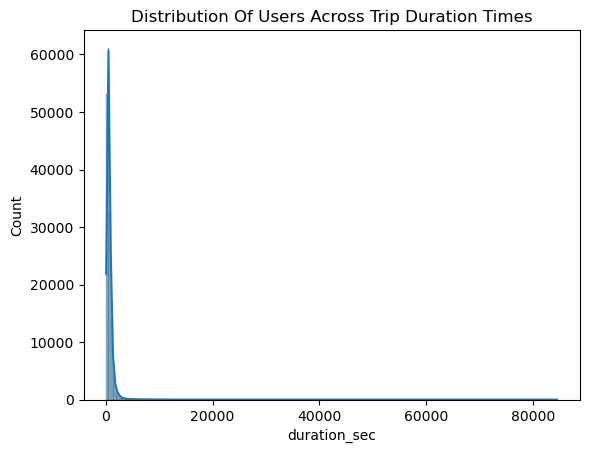

In [45]:
#Create a histogram to see the frequency distribution time duration among users
bins = np.arange(60, bikes['duration_sec'].max()+5, 300)
sb.histplot(data=bikes,x='duration_sec', bins=bins,kde=True);
plt.title("Distribution Of Users Across Trip Duration Times");

**Observation**
Most of the users are concentrated below 1000 seconds. We have very few extreme outliers almost to none

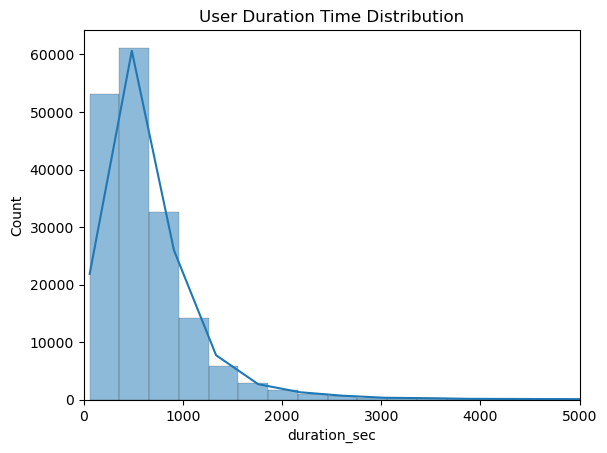

In [14]:
##Plot the time duration with a limit on 5000 where the graph seems to start to flatten
bins = np.arange(60, bikes['duration_sec'].max()+5, 300)
sb.histplot(data=bikes,x='duration_sec', bins=bins,kde=True).set(title="User Duration Time Distribution")
plt.xlim(0,5000);

**Observation**
Most users takes trips betweeb 300 to 400 seconds

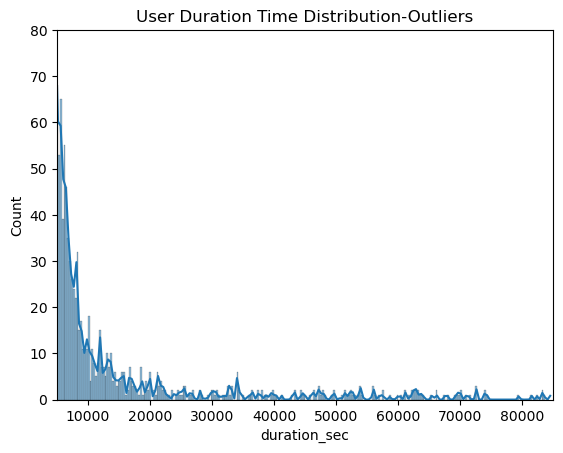

In [15]:
#Plot the remaining outliers to see significance
bins = np.arange(60, bikes['duration_sec'].max()+5, 300)
sb.histplot(data=bikes,x='duration_sec', bins=bins,kde=True).set(title="User Duration Time Distribution-Outliers")
plt.xlim(5000,85000)
plt.ylim(0,80);

**Observation**
The number of people taking longer trips starts being very small above 20 000 seconds
From the twon graphs , it is observed that the number of people start to decrease signficantly above 3000 seconds. We are to identify the common attributes of users in this time duration range and give recommendations to the business for targeted marketing to current or potential customers so as to increase thier numbers

In [16]:
#Create a new dataframe with people who take bike rides above 3000 seconds
df = bikes.loc[bikes['duration_sec']>= 3000]
#Create a dataframe for users below this range incase we need to compare some results at some point
df2 = bikes.loc[bikes['duration_sec'] < 3000]
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,35.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,47.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,No,30.0
55,3478,2019-02-28 22:39:35.0200,2019-02-28 23:37:33.3420,11.0,Davis St at Jackson St,11.0,Davis St at Jackson St,1846,Subscriber,Male,No,24.0
56,3140,2019-02-28 22:44:53.5030,2019-02-28 23:37:14.0900,11.0,Davis St at Jackson St,11.0,Davis St at Jackson St,3040,Subscriber,Female,No,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...
181707,3980,2019-02-01 07:58:36.8520,2019-02-01 09:04:57.4250,141.0,Valencia St at Cesar Chavez St,15.0,San Francisco Ferry Building (Harry Bridges Pl...,5454,Subscriber,Female,Yes,44.0
181850,3497,2019-02-01 07:58:41.4470,2019-02-01 08:56:58.6340,141.0,Valencia St at Cesar Chavez St,15.0,San Francisco Ferry Building (Harry Bridges Pl...,5226,Subscriber,Male,Yes,46.0
182133,6086,2019-02-01 07:00:02.0420,2019-02-01 08:41:28.2510,380.0,Masonic Ave at Turk St,377.0,Fell St at Stanyan St,4956,Subscriber,Other,No,48.0
182411,13609,2019-02-01 04:38:43.6010,2019-02-01 08:25:33.4930,106.0,Sanchez St at 17th St,79.0,7th St at Brannan St,4944,Subscriber,Male,Yes,37.0


#### Question
What is the composition of our user base along the common user attributes

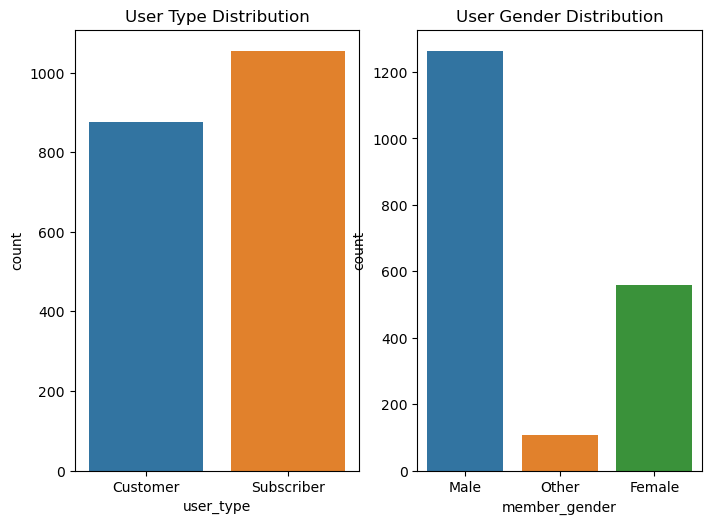

In [17]:
#Create a bar chart to see the composition of our user bases
fig , ax =plt.subplots(1,2 ,figsize=(7,5))
fig.tight_layout()
sb.countplot(x = df['user_type'], ax=ax[0]).set(title="User Type Distribution")
sb.countplot(x= df['member_gender'], ax=ax[1]).set(title="User Gender Distribution");

##### Observation
**There are more subscribers who take longer rides than customers.However the difference isnt signficantly large.**
**As anticipated we have more males than females. The other gender might be for people who are non-binary.That still holds the  smallest of our user population**


#### Question
**What  is the age distribution of our users ?**

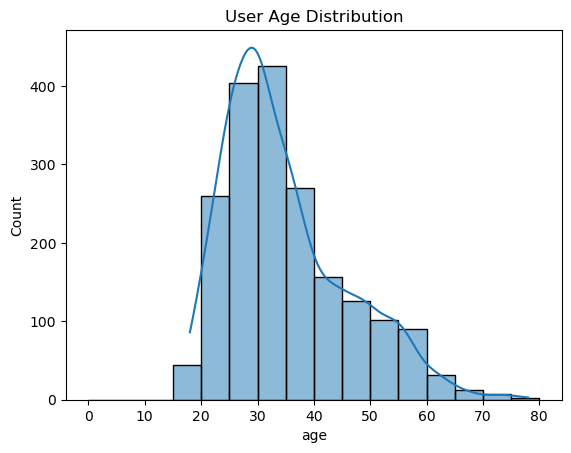

In [18]:
bins = np.arange(0,df['age'].max()+5,5)
sb.histplot(data=df ,x='age',kde=True,bins=bins).set(title="User Age Distribution");

#### Observation
**Most of our users are between the ages of 25 and 40 .These are young adults and adults.**

#### Question 1b
### What does user activity look like

### Question
**Which stations recieve the highest   traffic from these users**

In [19]:
#Find the number of stations
df['start_station_name'].unique()

array(['Montgomery St BART Station (Market St at 2nd St)',
       'Market St at Dolores St', 'Grove St at Masonic Ave',
       'Davis St at Jackson St', '24th St at Market St',
       'Channing Way at Shattuck Ave', 'The Embarcadero at Sansome St',
       'The Embarcadero at Bryant St', 'Post St at Kearny St',
       'Parker St at Fulton St', '3rd St at Townsend St',
       '20th St at Dolores St', 'Market St at 10th St',
       '9th St at San Fernando St', 'Lakeside Dr at 14th St',
       'Powell St BART Station (Market St at 5th St)',
       'Ashby BART Station', "O'Farrell St at Divisadero St",
       'Grand Ave at Santa Clara Ave', 'Grove St at Divisadero',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Rockridge BART Station',
       'Yerba Buena Center for the Arts (Howard St at 3rd St)',
       'Jack London Square', 'Williams Ave at 3rd St',
       'Valencia St at 16th St', 'Berry St at 4th St',
       'Potrero del Sol Park (25th St at Utah St)', 'Doyle St 

**We have 273 stations , it will be unneccesary to try to visualize all of them on one graph so lets select only the top 10 most visited stations**

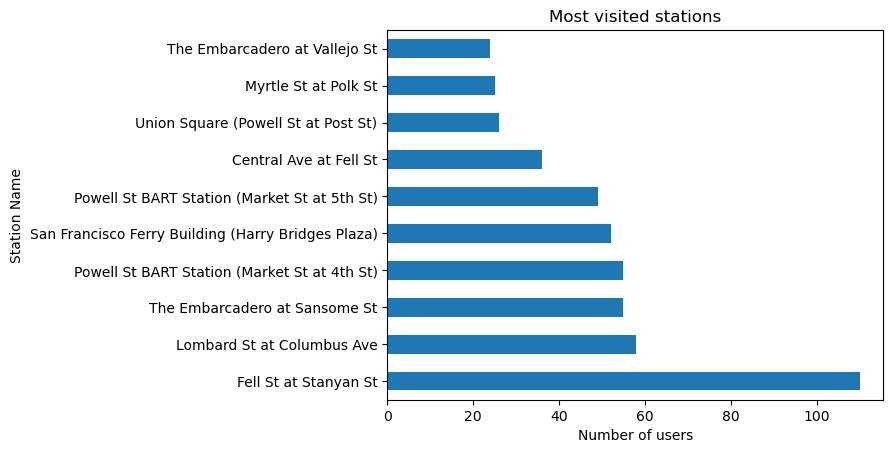

In [42]:
#Visualize the most visited stations
most_visited_stations = df['start_station_name'].value_counts().sort_values(ascending = False).head(10)
most_visited_stations.plot.barh()
plt.xlabel("Number of users")
plt.ylabel("Station Name");
plt.title("Most visited stations");

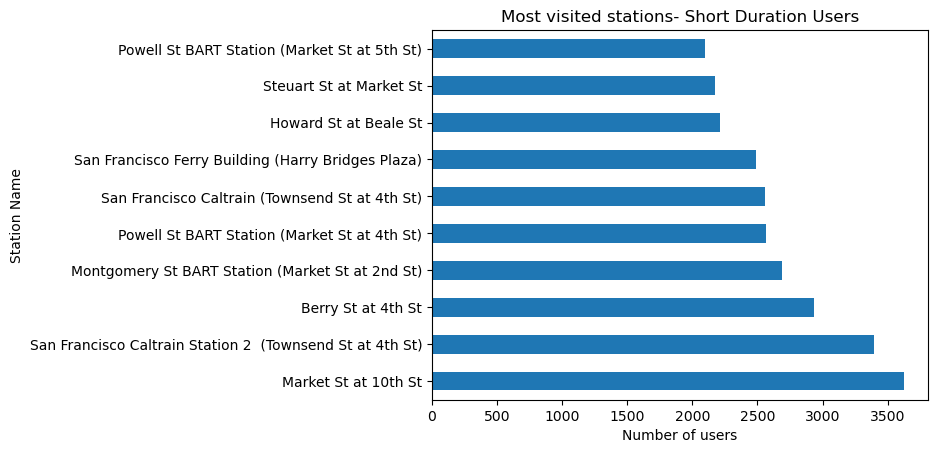

In [43]:
#Visualize the stations for users below our interest to see if there are any points of interest
most_visited_stations = df2['start_station_name'].value_counts().sort_values(ascending = False).head(10)
most_visited_stations.plot.barh()
plt.xlabel("Number of users")
plt.ylabel("Station Name")
plt.title("Most visited stations- Short Duration Users");

#### Observation
**From these two graphs , it is observed that most of the stations are different.This might point out the stations where we would need to direct our marketing efforts more too, ie stations which get less of our desired user type**

#### Question
**Which is the most common bike share option,full trip or not ?**

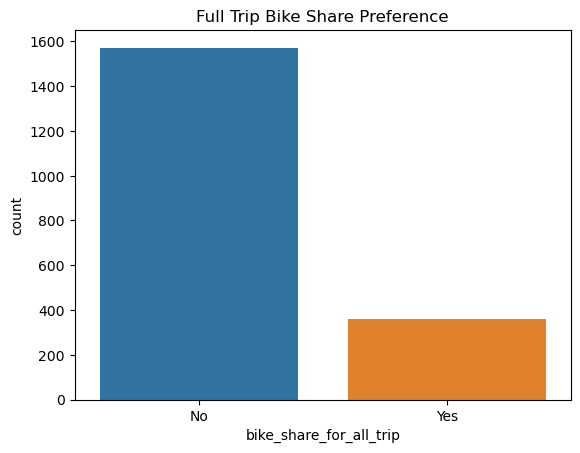

In [22]:
sb.countplot(data=df,x='bike_share_for_all_trip').set(title="Full Trip Bike Share Preference");

#### Observations
**Many long trip users opt to not share thier bike ride for the entire duration of the trip**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I discovered that most of our users are adults between the ages of 25 and 40. They are mostly male .
 > Most users who take longer trip rides are on subscription. I also found out that most users do not bike share for the entire trip , possibly because most of the trips have a very short duration around 300 to 800 seconds. This begs the question to explore the type of activities our users might be using the bike sharing system.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The frequency distribution of duration seconds was quite unusual because l expected a normal distribution.But it turned out to be left-skewed.
> I removed a some columns which were not going to be useful to our investigation like co-ordinates, these would require extra work to find the place on a map and identify them .Instead l kept the station names as they would be a better indicator for user concentration
> I had to transform the member birth year column into ages instead because the years on thier own were not very useful ,so  l calculated the ages of the users and used that to see the user age group range.
> l also separated the data into two parts, df and df2, the first for people who take longer trips and the latter for people who take comparably shorter trips.This has allowed to specifically look at the attributes where our main interest lie, ie increasing the number of people who take longer trips



## Bivariate Exploration

In [61]:
##Function for creating catplots
def catplot(df, xvar, huevar=None, color=0, palette=None,yvar = None, order=None):
    #set plot dimentions
    plt.figure(figsize = [14,6])
    #plot
    sb.catplot(data=df, x=xvar,y=yvar, hue=huevar, color=sb.color_palette()[color], palette=palette, order=order, edgecolor='black')
    #clean up variable names
    xvar = xvar.replace("_"," ")
    if huevar:
        huevar = huevar.replace("_"," ")
    #add title and format it
    plt.title(f"Distribution of bike rides: {xvar} {'by' if huevar else ''} {huevar if huevar else ''}" .title(), fontsize=14, weight='bold')
    #add x label and format it
    plt.xlabel(xvar.title(), fontsize=10, weight='bold')
    #add y label and format it
    plt.ylabel('duration_sec', fontsize=10, weight='bold'  )


##### Question
Does gender have an influence on the  duration of trip

<Figure size 1400x600 with 0 Axes>

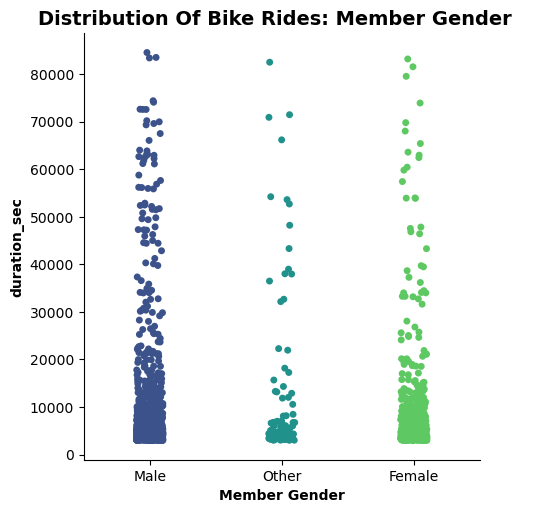

In [62]:
#Plot a catplot to compare the relative concentration of genders across the time range
catplot(df,xvar='member_gender',yvar='duration_sec',palette='viridis');

**Observation**
Males take more longer trips than females. There is generrally a high concentration of males taking trips of varying times from the shortest times to the longest times . But as trip duration increases, we tend to have fewer females. For the longest trips there are very few people  and most of them are male.


<Figure size 1400x600 with 0 Axes>

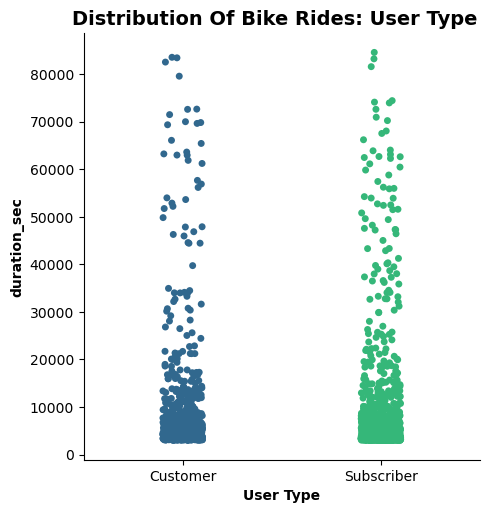

In [60]:
#Plot a catplot to see the same for user type
catplot(df,xvar='user_type',yvar='duration_sec',palette='viridis');

**Observation**
We have a high concentration of subscribers in the longer bike duration range.As time duration increases, the concentration becomes more sparse for both user times, but mostly in customers , showing that thier numbers decrease as the time duration increases

<Figure size 1400x600 with 0 Axes>

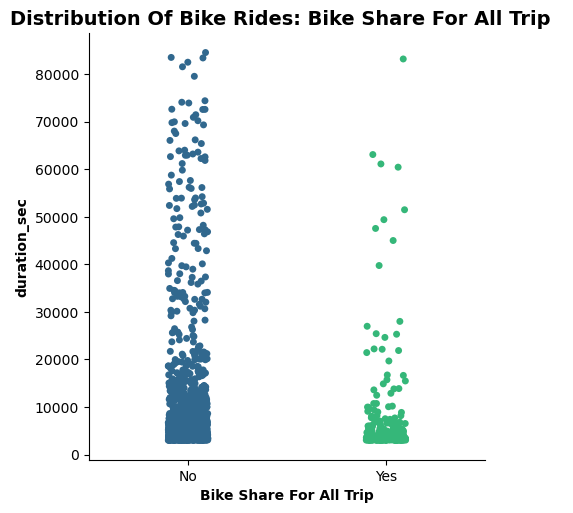

In [63]:
## Plot the same for bike share
catplot(df,xvar='bike_share_for_all_trip',yvar='duration_sec',palette='viridis');

**Observation**
Most people dont share thier trips . As trip duration increases we tend to have fewer and fewer people sharing thier rides.But the decrease in number of people is more apperant in people who share bike rides than those who dont

##### Question
**How does trip duration vary according to age**

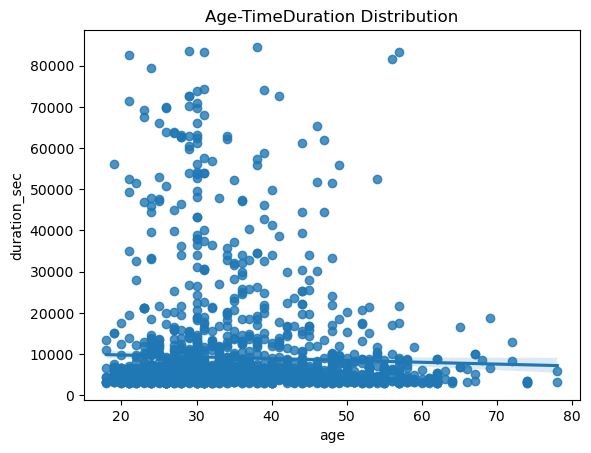

In [26]:
#plot a scatterplot see the correlation
sb.regplot(data=df,x='age',y='duration_sec').set(title="Age-TimeDuration Distribution");

**Observation**
There is no correlation between age and trip duration. The regression line is a horizontal straightline

**Question**
What are the relative proportions of gender in our user types

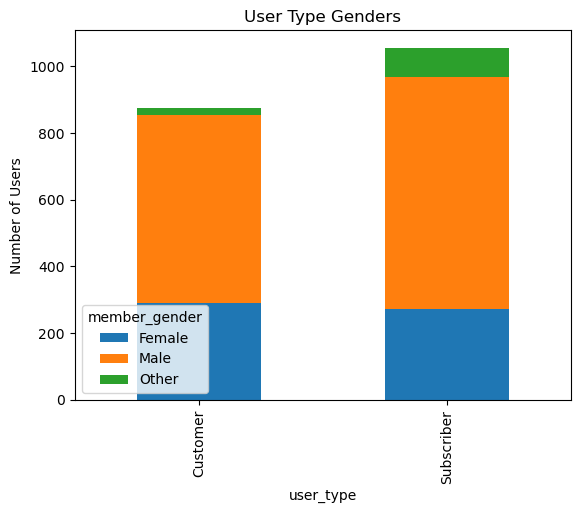

In [27]:
age_gender = pd.crosstab(index=df['user_type'],columns=df['member_gender'])
age_gender.plot(kind="bar",stacked=True,title="User Type Genders")
plt.ylabel("Number of Users");

**Observation**
We have more females in the long bike duration range, for both customers and subscribers.
We know that we have more subscribers taking longer bike rides than customers and most of these subscribers are female.
How ever from a previous visualisation we saw that we have a greater concentration of males taking longer trips than females.We can analyse this furthur(multivariate analysis) by looking at the relationship bewteen user type, gender and time duration

<Figure size 1400x600 with 0 Axes>

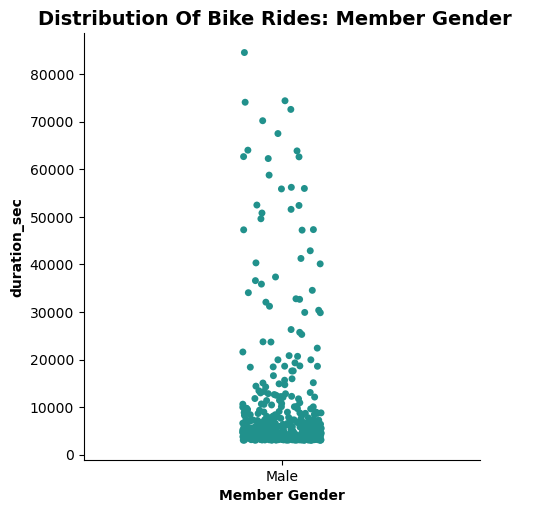

In [64]:
first_group = df[( bikes['member_gender'].str.contains("Male")  & bikes["user_type"].str.contains("Subscriber")  & bikes['bike_share_for_all_trip'].str.contains("No") )];
catplot(first_group,xvar='member_gender',yvar='duration_sec',palette='viridis');
sec_group = df[(bikes['member_gender'].str.contains("Female") & bikes["user_type"].str.contains("Subscriber") & bikes[
    'bike_share_for_all_trip'].str.contains("No"))];

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I saw that as the time duration increases, the concentration of users become more sparse.Females tend to get fewer for longer times.
> There are more subscribers than customers who take longer bike rides.And the concentration of subscribers decrease less signficantly than those of customers as the time duration increases. It was also interesting to note that  although we have more female subscribers than male ,majority  of the few men subscribers are the ones who take the signficantly longer trips.
> There is no correlation between age and trip duration however users between the ages of 25 and 40  tend to have longer trips


## Multivariate Exploration

**Question**
Which users have relatively higher time duration : male subcribers or female subscribers ?
Which user type have relatively higher time duration [ x] who share bikes or [x] who dont share bikes ?
What is the average age of [x] users
Which stations are do these users go to most

**Question**
What gender of users take relatively longer times ?

<Figure size 1400x600 with 0 Axes>

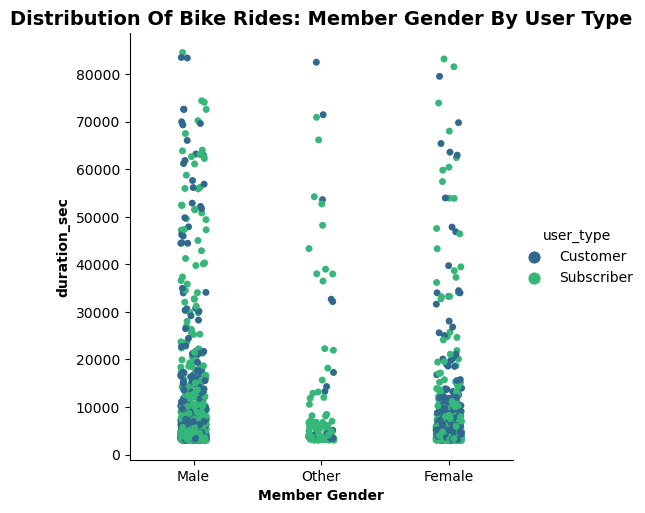

In [69]:
#Plot cat plot
catplot(df,xvar='member_gender',yvar='duration_sec',palette='viridis',huevar='user_type');

**Observation**
Males overal have take longer bikes rides.This is seen by thier concentration in the time range.
More male subscribers take longer bike rides

**Question**
Does bike sharing option affect the user base composition ?

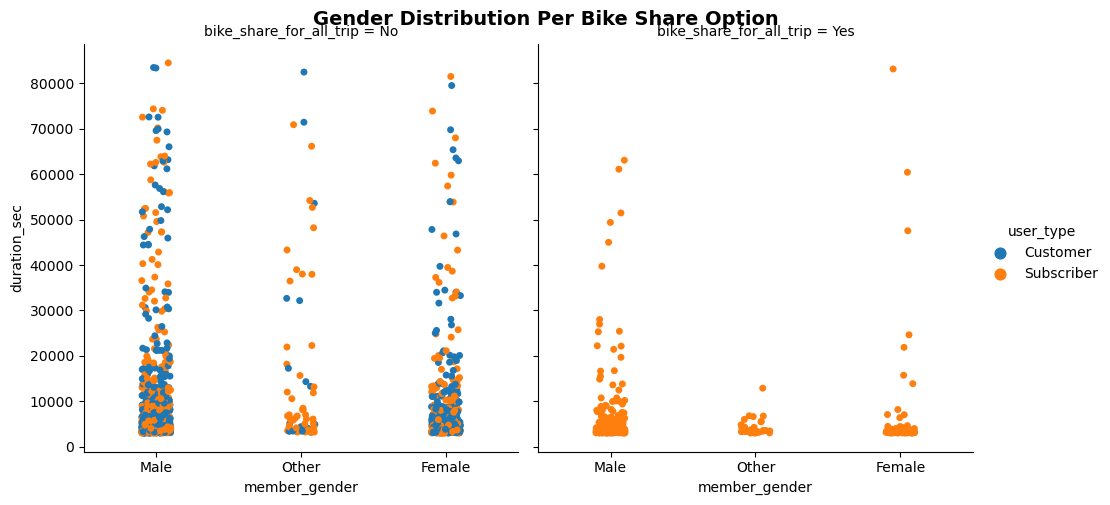

In [35]:
sb.catplot(data = df , x ='member_gender',y='duration_sec',hue='user_type',col='bike_share_for_all_trip');
plt.suptitle("Gender Distribution Per Bike Share Option".title(), y = 1,
            fontsize = 14, weight = "bold");

**Observation**
Female customers taking longer bike rides do not share the ride
There are more male subscribers who take longer trips and dont share the rides


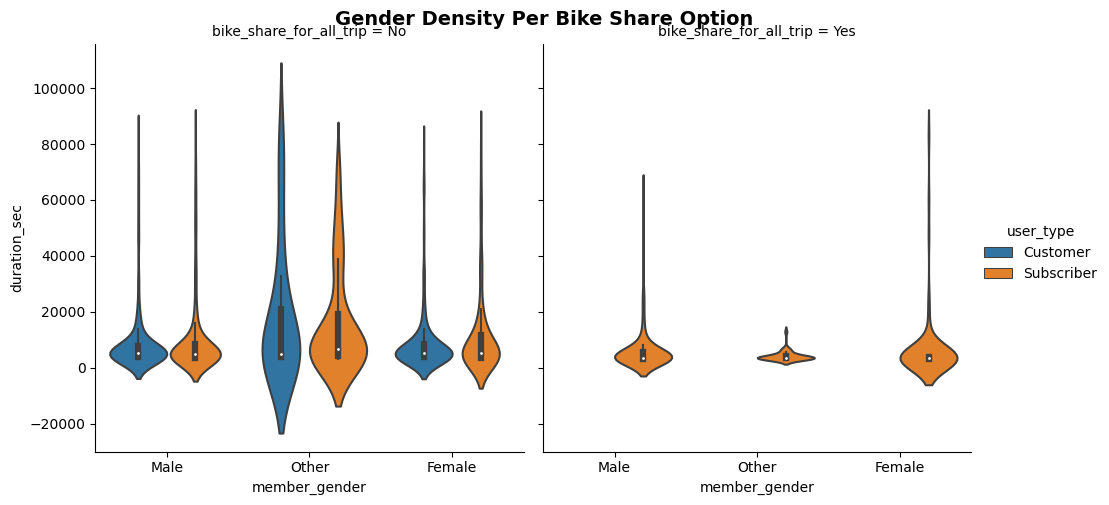

In [36]:
sb.catplot(data=df, x ='member_gender',y='duration_sec',hue='user_type',kind='violin',col='bike_share_for_all_trip');
plt.suptitle("Gender Density Per Bike Share Option".title(), y = 1,
            fontsize = 14, weight = "bold");


**Observations**
Although we would want to have more users with the highest times, it is apperant that most of our users are concentrated below the 20000 second point and our efforts should be directed towards those


# Extra plots to visualize key features in our target user group

**Question- Univariate plot**
Which stations get the most number of male subscribers who dont share trips

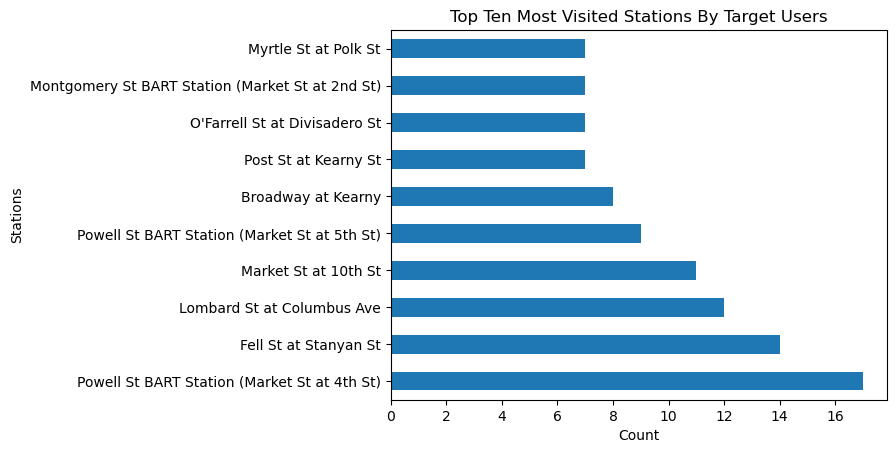

In [40]:
#Select the ideal male user group with all the relevant features
ideal_males = df[( bikes['member_gender'].str.contains("Male")  & bikes["user_type"].str.contains("Subscriber")  & bikes['bike_share_for_all_trip'].str.contains("No") )];
# sb.catplot(data=station_list,x='member_gender',y='duration_sec').set(title="FullTrip Bike Share-Time Distribution");
st = ideal_males['start_station_name'].value_counts().sort_values(ascending = False).head(10)
st.plot.barh()
plt.title("Top Ten Most Visited Stations By Target Users")
plt.xlabel("Count")
plt.ylabel("Stations");

**Observation**
Most of our target users get their bike rides on the different locations in Market street

**Question - Bivariate plot**
What is the age distribution of our target users ?

In [33]:
age_dist = ideal_males[['age','duration_sec']]
age_dist

,age,duration_sec
55,24.0,3478
199,39.0,15123
297,32.0,13061
524,25.0,6447
633,28.0,3069
...,...,...
178416,30.0,31203
179373,33.0,4050
179732,30.0,10568
180894,33.0,4790


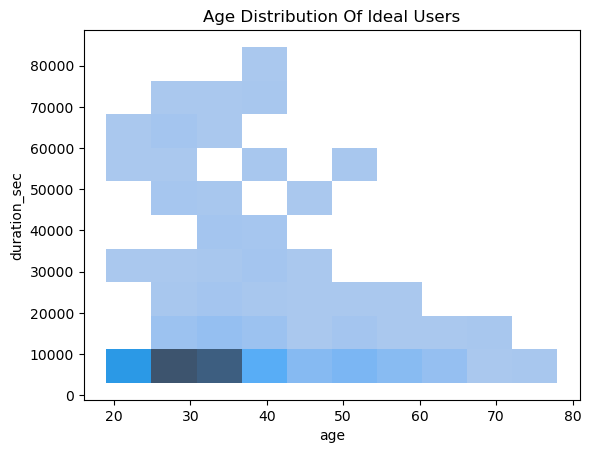

In [34]:
sb.histplot(data=age_dist,x='age',y='duration_sec',bins=10).set(title="Age Distribution Of Ideal Users");

**Observation**
There is a high concentration of our desired users between the age of 25 and 35.Males older than 40 have low probability of taking longer bike rides

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> I observed that our users tend to become less and less as time duration increases but the rate of decrease in number of users is less for male subscribers between the ages of 25 and 35.Usually these males dont share thier trips.They usually go to stations in differnt locations on Market Street.So these are our target users.With who we can optimize to target our marketing in the identified location of thiers highest occurances
> Users are mainly concentrated in short durations and our goals is to increase user density on the higher duration time scale by marketing to those people with similar traits or reletively similar attributes .


## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.
My research was to analyse the features common to users who take longer bike rides so that l can come up with a target persona that can be used by Ford Go to create a marketing campaign targeting these types of users.I found out that thes users are mainly male subscribers between the ages of 25 and 35 and most of them dont share bike trips. I also found out that Market Street stations recieve a high incidence of these users.
During my exploration l first removed data that was missing values in two important columns(member gender and age). This made up 4.5% of the data so it was not very signficant to the overall dataset.I then removed any irrelevant columns that did not contain the attributes of users or thier usage insights.From this stage l was also able to get a high level overview of the data l had and was able to group it into user attributes and usage insights.
My univariate exploration was based on trying to understand the distribution of attributes along the users of interest.So l first identified the appropriate time range to call long. Then went on to identify how user and usage attributes where distributed in this range. From this l was able to identify some traits that could be worth furthur consideration in our bivariate exploration.From this l found out that most of our users where adults between 25 and 40 and where mostly male. I also found out that very few people share rides.
In bivariate exploration , l then looked for relationships that existed between the attributes l identified earlier.Here it was interesting to note that as time duration increases the concentration of users become less and females become significantly fewer than males yet we had more females in the subscriber type than males .It was also interesting to note that age didnt have any effect on how long a person took a ride for.
> From bivariate exploration l now knew which features affected high bike duration so l started combining them to see thier overall effect if they were combined in one user.Here thats l observed that  of our subscribers, the most prominent ones were males who took longer rides. Since age had no influence on bike duration, l analysed it independely to see the distribution of our users on an age scale.Then l made my final conclusions based upon the overall influence of combined features on a users.
